# 2. Make a detailed notebook containing all the statistical operations and form various kinds of plots depicting the data or the business focused on.

### Importing necessary libraries

In [53]:
import nltk
import csv
from nltk.corpus import stopwords
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
import numpy as np
%matplotlib inline


### Importing Dataset

In [54]:
df = pd.read_csv('netflix.csv')

In [55]:
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


### Checking for Null

In [56]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Summary statistics

In [57]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Charts

In [58]:
df['length']=df['title'].str.len()

<Axes: >

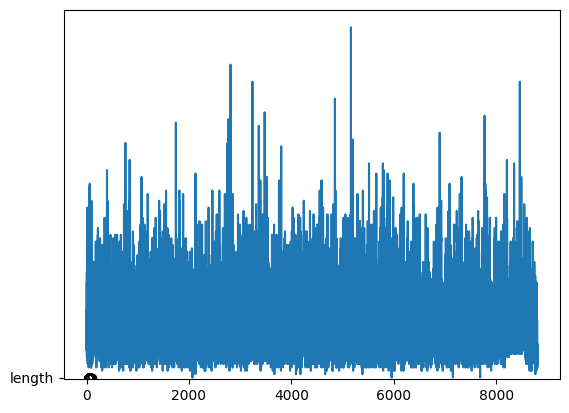

In [59]:
df['length'].plot()
df['length'].plot(kind='box', vert=False)

### Histogram

<Axes: ylabel='Frequency'>

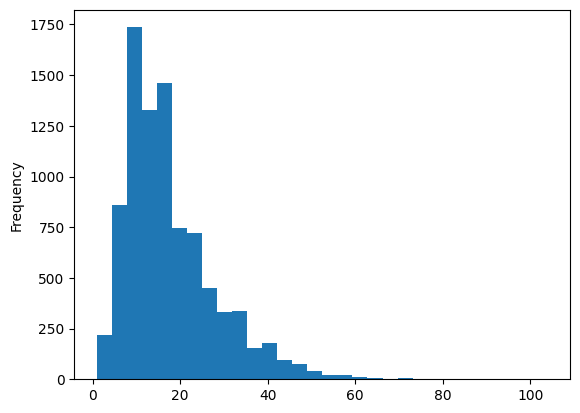

In [60]:
df['length'].plot(kind='hist', bins=30)

# 1. Use regex to remove stop words.

In [61]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'by', 'hers', 'he', 'ourselves', 'those', 'between', 'have', 'having', 'what', 'all', 'ma', "needn't", 'herself', 'has', 'most', 'not', 'and', 'nor', "you'll", 'yourselves', 'if', 'll', 'there', 'out', 'me', 'for', 'same', 'isn', 'yours', 'under', "that'll", "couldn't", "haven't", 'yourself', 'until', 'be', 'but', 'd', "wouldn't", 'further', 'wouldn', "it's", 'an', 'more', 'are', 'that', 'hadn', 's', "isn't", 'been', 'too', 'no', 'her', 'other', 'at', 'being', "won't", 'does', 'once', 'ours', 'myself', 'couldn', 'how', 'above', "don't", 'o', 'did', 'was', 'up', 'they', "should've", 'while', 'now', 'before', 'won', 'shouldn', 'below', "hasn't", 'we', 'own', 'each', 'then', 'haven', 'themselves', 'a', 're', "didn't", 'from', 'i', 'few', 'had', 'in', 'himself', 'these', 'after', "hadn't", 'into', 'doing', 'the', 'why', 'than', "mustn't", 'about', 'it', 'off', "wasn't", 'she', 'ain', 'whom', 'were', 'will', "doesn't", 'didn', 't', "she's", 'when', 'to', 'on', 'can', 'again', 'only', 'shan

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gragh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

### Removing Stopwords

In [63]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    text = re.sub(r'[!\'.,]','',text)
    
    return text

### Bar Plot

C:\Users\gragh\AppData\Local\Temp\ipykernel_15572\4247006130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_duration_by_country, x="country", y="duration", palette="muted")
C:\Users\gragh\AppData\Local\Temp\ipykernel_15572\4247006130.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


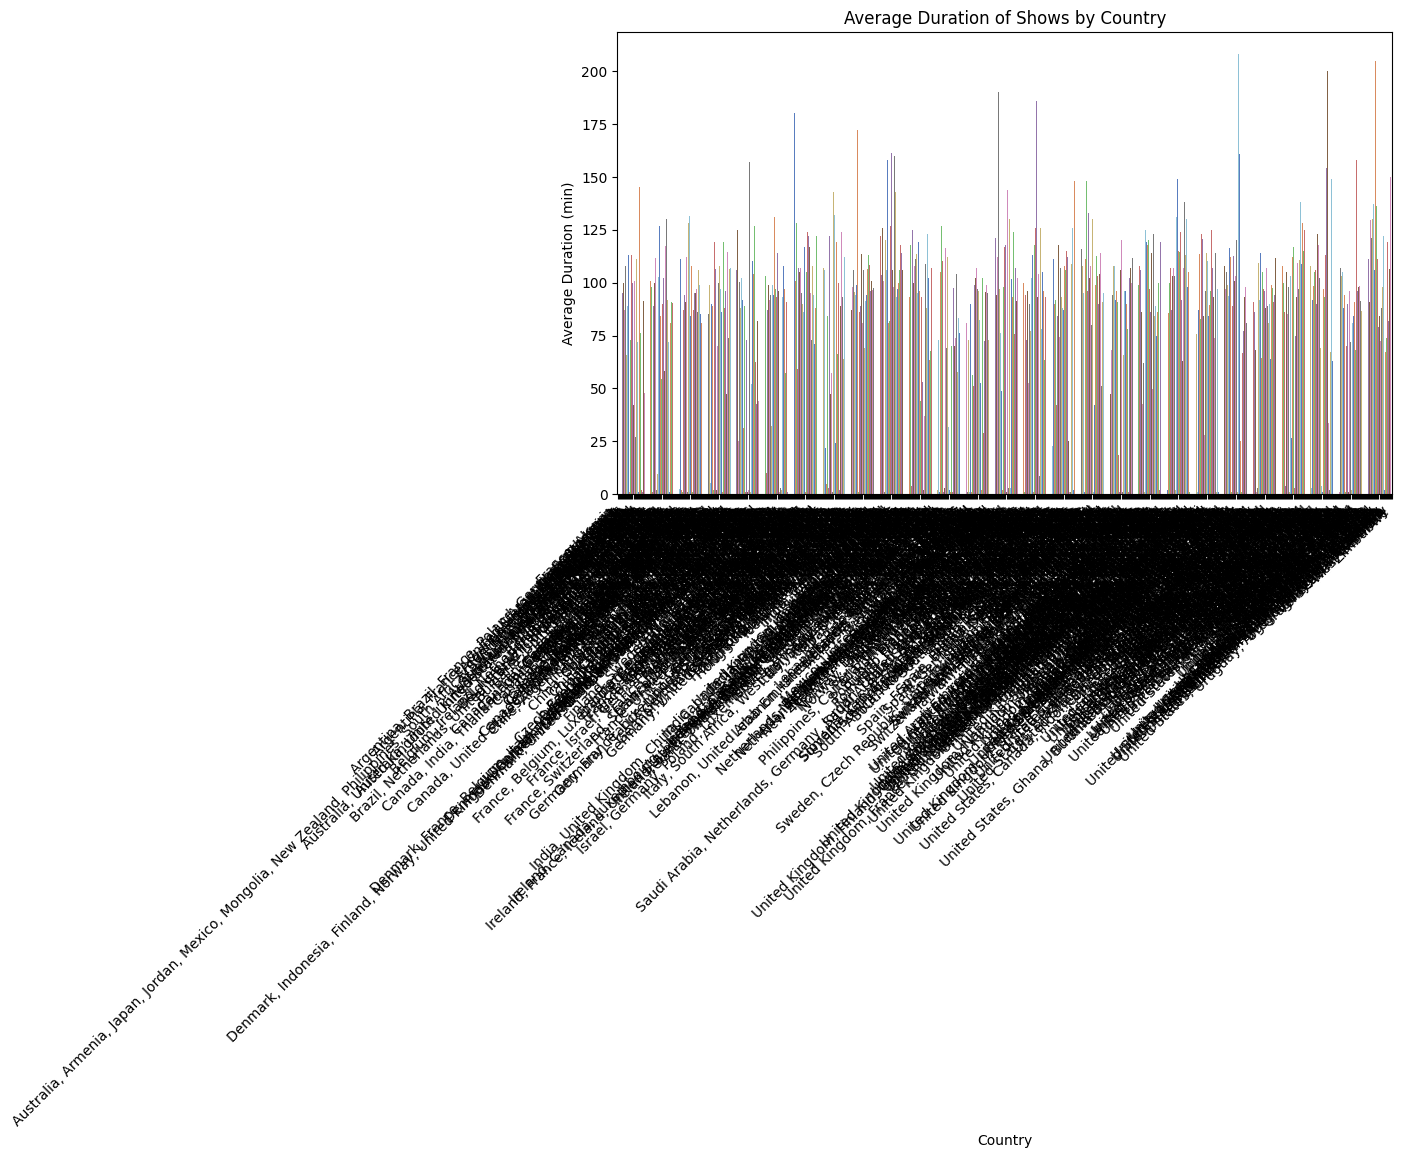

In [75]:
avg_duration_by_country = df.groupby('country')['duration'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_duration_by_country, x="country", y="duration", palette="muted")
plt.title('Average Duration of Shows by Country')
plt.xlabel('Country')
plt.ylabel('Average Duration (min)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Box Plot

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\gragh\AppData\Local\Temp\ipykernel_15572\2507423520.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['duration'] = df['duration'].str.extract('(\d+)').astype(float)


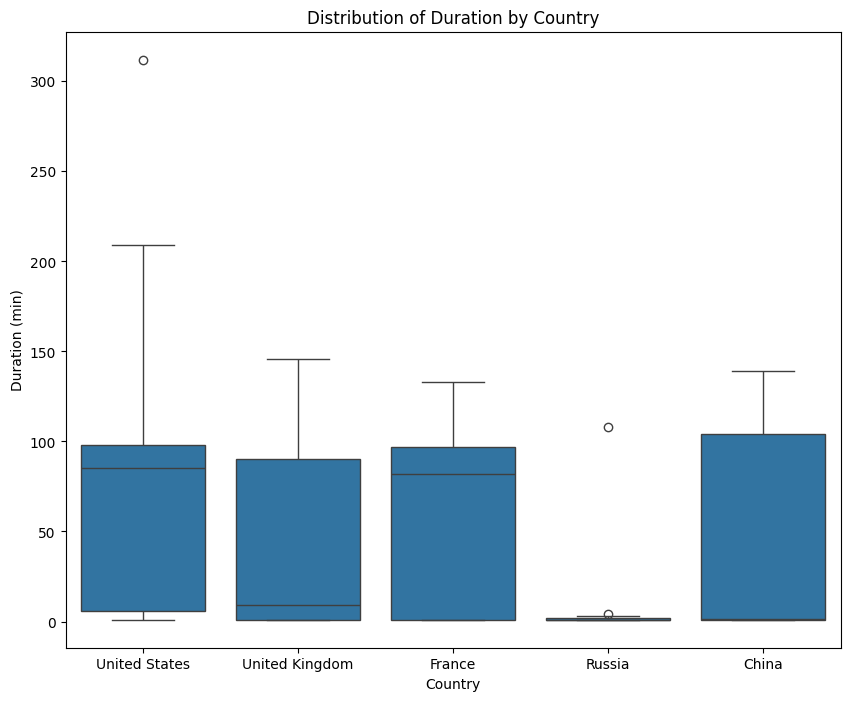

In [74]:
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Filter the DataFrame to include only shows from specific countries
where = df['country'].isin(['United States', 'France', 'United Kingdom', 'China', 'Russia'])

# Create a box plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[where], x="country", y="duration")
plt.title('Distribution of Duration by Country')
plt.xlabel('Country')
plt.ylabel('Duration (min)')
plt.show()

### Histogram

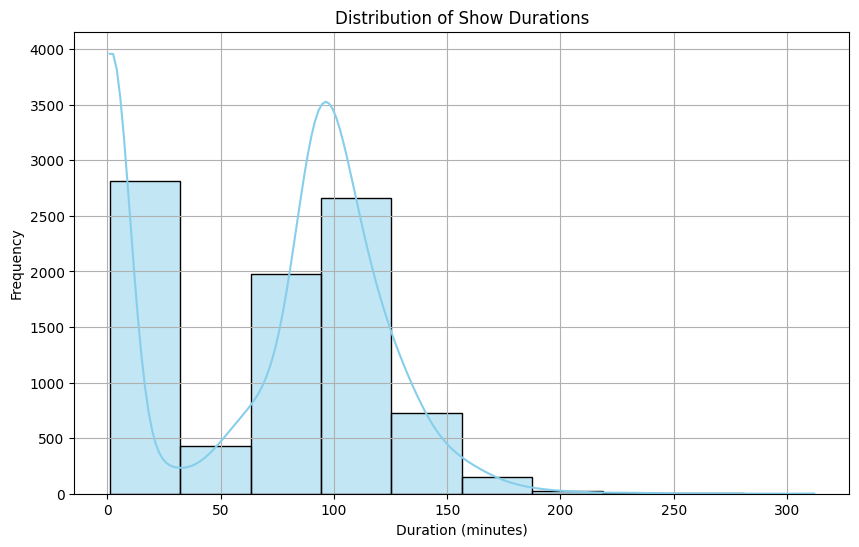

In [79]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Show Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [72]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

In [81]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:tokens = fun(tokens)
    return tokens
df['tokens'] = df['title'].apply(prepare, pipeline=pipeline)

In [82]:
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
love,171
man,81
world,78
life,78
christmas,78
story,75
movie,73
little,64
one,63


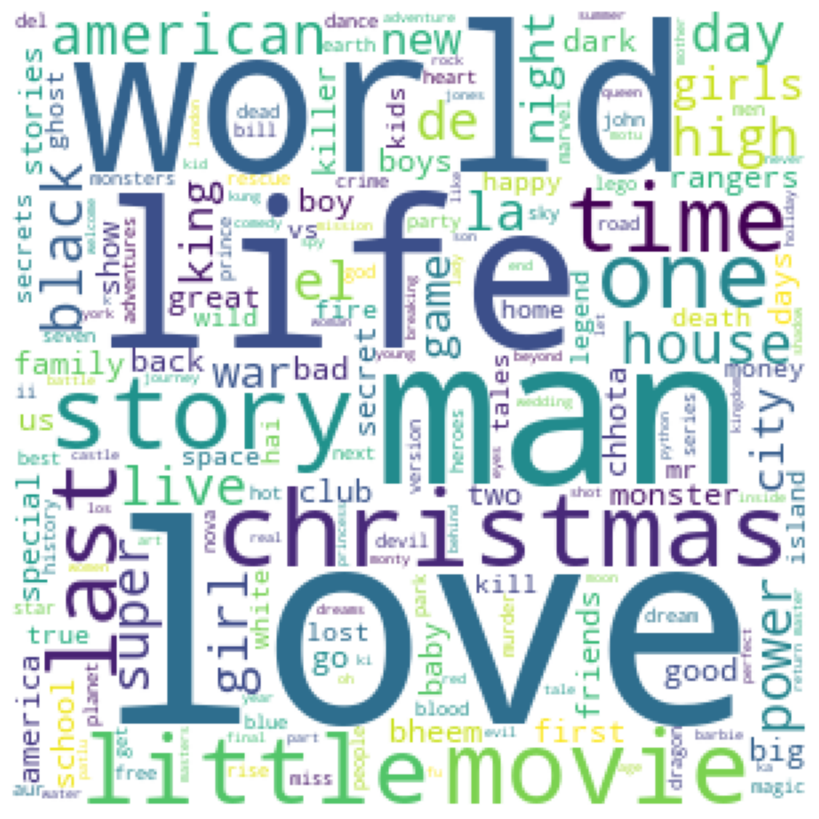

In [83]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [84]:
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    counter = Counter()
    df[column].map(update)# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [85]:
freq_df['title'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,title
token,,
love,171,693.131985
man,81,388.903316
world,78,376.474278
life,78,376.474278
christmas,78,378.500366


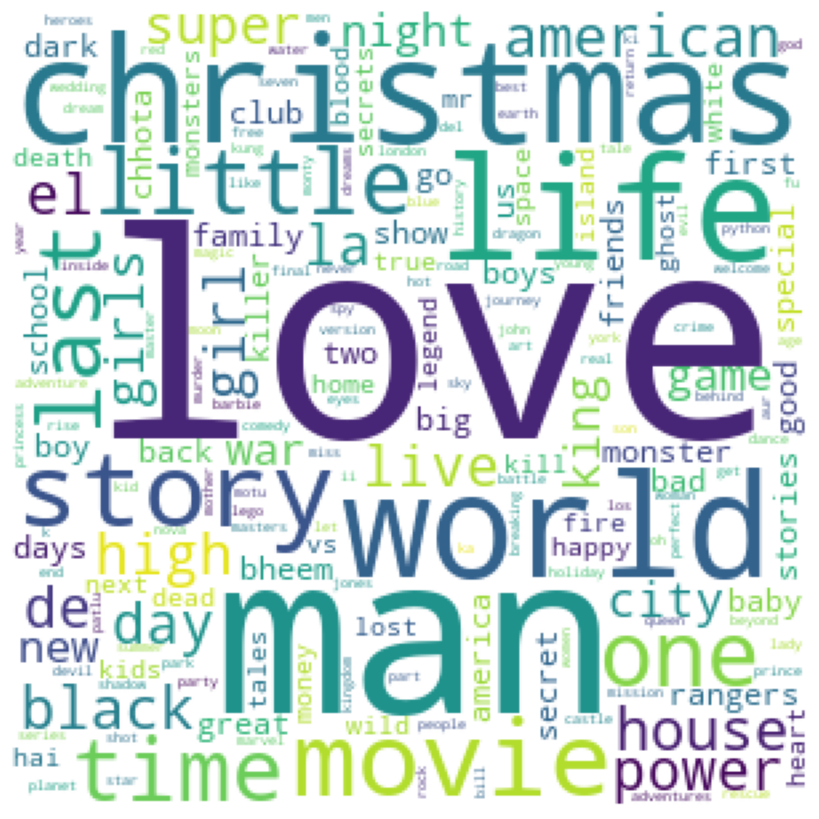

In [87]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['title'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [88]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [89]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

In [94]:
# List of keywords to analyze
keywords = ['love', 'story', 'man', 'movie', 'time', 'life', 'world', 'christmas', 'little']

# Function to count keywords in text
def count_keywords(text, keywords):
    return {keyword: text.lower().count(keyword) for keyword in keywords}

# Apply count_keywords function to 'description' column
df['keyword_counts'] = df['description'].apply(lambda x: count_keywords(x, keywords))

# Convert keyword counts to DataFrame
keyword_counts_df = pd.DataFrame(df['keyword_counts'].tolist(), index=df.index)

# Fill NaN values with 0
keyword_counts_df.fillna(0, inplace=True)

# Normalize keyword counts by dividing by total number of keywords
keyword_freq_df = keyword_counts_df.div(keyword_counts_df.sum(axis=1), axis=0)

# Apply square root transformation for visualization purposes
keyword_freq_sqrt_df = keyword_freq_df.apply(np.sqrt)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(keyword_freq_sqrt_df, cmap="Reds", annot=True, fmt=".2f", xticklabels=True, yticklabels=True)
plt.title('Keyword Frequency Heatmap')
plt.xlabel('Keywords')
plt.ylabel('Shows')
plt.xticks(rotation=45, ha='right')
plt.show()
